In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [7]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [9]:
 diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [10]:
diabetes.head(10)

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,0,A
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,1,C
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,0,A
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,1,D
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,1,A


In [11]:
import tensorflow as tf

In [12]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
glu_con = tf.feature_column.numeric_column('Glucose_concentration')
bp = tf.feature_column.numeric_column('Blood_pressure')
tri = tf.feature_column.numeric_column('Triceps')
insu = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedi = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [14]:
assi_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

In [15]:
assi_group

_VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

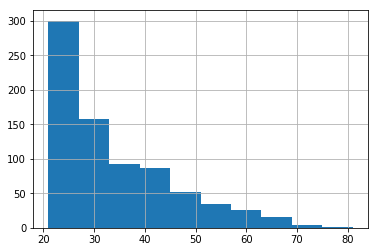

In [18]:
diabetes['Age'].hist()

In [20]:
age_buc = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [21]:
fea_cols = [num_preg, glu_con, bp, tri, insu, bmi, pedi, assi_group, age_buc]

In [22]:
x_data = diabetes.drop('Class',axis=1)

In [23]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [24]:
y = diabetes['Class']

In [25]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y, test_size=0.3)

In [30]:
X_train.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
62,0.294118,0.221106,0.508197,0.000000,0.000000,0.372578,0.217336,36,C
700,0.117647,0.613065,0.622951,0.272727,0.236407,0.535022,0.172929,26,D
137,0.000000,0.467337,0.491803,0.252525,0.108747,0.427720,0.193851,22,C
115,0.235294,0.733668,0.754098,0.000000,0.000000,0.464978,0.196840,61,B
53,0.470588,0.884422,0.737705,0.343434,0.354610,0.502235,0.166097,58,C


In [32]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [33]:
model = tf.estimator.LinearClassifier(feature_columns=fea_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vprav\\AppData\\Local\\Temp\\tmp24f71ku8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023B0DE9A588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\vprav\AppData\Local\Temp\tmp24f71ku8\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 71.692
INFO:tensorflow:loss = 6.587459, step = 100 (1.412 sec)
INFO:tensorflow:global_step/sec: 97.3724
INFO:tensorflow:loss = 7.357995, step = 200 (0.994 sec)
INFO:tensorflow:global_step/sec: 98.8172
INFO:tensorflow:loss = 6.041326, step = 300 (1.012 sec)
INFO:tensorflow:global_step/sec: 99.0621
INFO:tensorflow:loss = 3.6977453, step = 400 (1.009 sec)
INFO:tensorflow:global_step/sec: 98.4764
INFO:tensorflow:loss = 4.5934687, step = 500 (1.015 sec)
INFO:tensorflow:global_step/sec: 100.507
INFO:tensorflow:loss = 3.49975, step = 600 (0.995 sec)
INFO:tensorflow:global_step/sec: 10

In [36]:
eval_input = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test, batch_size=10,num_epochs=1, shuffle=False)

In [37]:
res = model.evaluate(eval_input)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-05-12:57:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\vprav\AppData\Local\Temp\tmp24f71ku8\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-05-12:57:34
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.6753247, auc = 0.7617521, auc_precision_recall = 0.5639179, average_loss = 0.55149734, global_step = 1000, label/mean = 0.32467532, loss = 5.3081617, precision = 0.6119403, prediction/mean = 0.37585628, recall = 0.5466667


In [38]:
res

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.6753247,
 'auc': 0.7617521,
 'auc_precision_recall': 0.5639179,
 'average_loss': 0.55149734,
 'label/mean': 0.32467532,
 'loss': 5.3081617,
 'precision': 0.6119403,
 'prediction/mean': 0.37585628,
 'recall': 0.5466667,
 'global_step': 1000}

In [39]:
pred_input = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1,shuffle=False)

In [40]:
list(model.predict(pred_input))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\vprav\AppData\Local\Temp\tmp24f71ku8\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-1.2224525], dtype=float32),
  'logistic': array([0.22750515], dtype=float32),
  'probabilities': array([0.77249485, 0.22750513], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.8811094], dtype=float32),
  'logistic': array([0.1322615], dtype=float32),
  'probabilities': array([0.86773854, 0.13226151], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.6769101], dtype=float32),
  'logistic': array([0.3369513], dtype=float32),
  'probabilities': array([0.66304874, 0.3369513 ], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.7789407], dtype=float32),
  'logistic': array([0.14443399], dtype=float32),
  'probabilities': array([0.85556597, 0.14443399], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits'

In [41]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=fea_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vprav\\AppData\\Local\\Temp\\tmpt9msqqhz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023B0DF91748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
dnn_model.train(input_func, steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [45]:
embedded_col = tf.feature_column.embedding_column(assi_group, dimension=4)

In [47]:
fea_cols = [num_preg, glu_con, bp, tri, insu, bmi, pedi, embedded_col, age_buc]

In [49]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [50]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=fea_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vprav\\AppData\\Local\\Temp\\tmpifa1qe1o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023B1C296BA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
dnn_model.train(input_func,steps=1000,)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\vprav\AppData\Local\Temp\tmpifa1qe1o\model.ckpt.
INFO:tensorflow:loss = 6.9838305, step = 0
INFO:tensorflow:global_step/sec: 68.8045
INFO:tensorflow:loss = 4.5547957, step = 100 (1.454 sec)
INFO:tensorflow:global_step/sec: 125.824
INFO:tensorflow:loss = 6.3787646, step = 200 (0.795 sec)
INFO:tensorflow:global_step/sec: 109.066
INFO:tensorflow:loss = 4.6533923, step = 300 (0.916 sec)
INFO:tensorflow:global_step/sec: 97.3725
INFO:tensorflow:loss = 3.452147, step = 400 (1.027 sec)
INFO:tensorflow:global_step/sec: 111.687
INFO:tensorflow:loss = 6.307398, step = 500 (0.895 sec)
INFO:tensorflow:global_step/sec: 110.636
INFO:tensorflow:loss = 3.2695322, step = 600 (0.903 sec)
INFO:tensorflow:global_step/se

In [52]:
eval_input = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [53]:
dnn_model.evaluate(eval_input)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-05-13:10:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\vprav\AppData\Local\Temp\tmpifa1qe1o\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-05-13:10:50
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.6753247, auc = 0.8226922, auc_precision_recall = 0.62962323, average_loss = 0.50513065, global_step = 1000, label/mean = 0.32467532, loss = 4.8618827, precision = 0.61538464, prediction/mean = 0.4098061, recall = 0.74666667


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.6753247,
 'auc': 0.8226922,
 'auc_precision_recall': 0.62962323,
 'average_loss': 0.50513065,
 'label/mean': 0.32467532,
 'loss': 4.8618827,
 'precision': 0.61538464,
 'prediction/mean': 0.4098061,
 'recall': 0.74666667,
 'global_step': 1000}

In [54]:
pred_input = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [55]:
list(dnn_model.predict(pred_input))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\vprav\AppData\Local\Temp\tmpifa1qe1o\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.7110647], dtype=float32),
  'logistic': array([0.3293636], dtype=float32),
  'probabilities': array([0.67063636, 0.3293636 ], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.8627119], dtype=float32),
  'logistic': array([0.13438727], dtype=float32),
  'probabilities': array([0.86561275, 0.13438727], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.42444187], dtype=float32),
  'logistic': array([0.39545432], dtype=float32),
  'probabilities': array([0.60454565, 0.39545432], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.6829588], dtype=float32),
  'logistic': array([0.15670407], dtype=float32),
  'probabilities': array([0.84329593, 0.15670407], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logit